In [ ]:
!pip install d2l==0.16

In [2]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

包含所有图像和CSV标签文件的香蕉检测数据集可以直接从互联网下载。

In [3]:
d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

读取香蕉检测数据集

In [4]:
def read_data_bananas(is_train=True):
    """读取香蕉检测数据集中的图像和标签。"""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train
                             else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else
                         'bananas_val', 'images', f'{img_name}')))
        # Here `target` contains (class, upper-left x, upper-left y,
        # lower-right x, lower-right y), where all the images have the same
        # banana class (index 0)
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256

创建一个自定义实例

In [5]:
class BananaDataset(torch.utils.data.Dataset):
  """一个用于加载香蕉检测数据集的自定义数据集"""
  def __init__(self,is_train):
    self.features,self.labels=read_data_bananas(is_train)
    print('read '+str(len(self.features))+(f'training examples'if is_train else f'validation examples'))
  
  def __getitem__(self,idx):
    return (self.features[idx].float(),self.labels[idx])
  
  def __len__(self):
    return len(self.features)

为训练集和测试集返回两个数据加载实例

In [8]:
def load_data_banana(batch_size):
  train_iter=torch.utils.data.DataLoader(BananaDataset(is_train=True),batch_size,shuffle=True)
  val_iter=torch.utils.data.DataLoader(BananaDataset(is_train=False),batch_size)
  return train_iter,val_iter

读取一个小批量，并打印其中的图像和标签的形状

In [9]:
batch_size,edge_size=32,256
train_iter,_=load_data_banana(batch_size)
batch=next(iter(train_iter))
batch[0].shape,batch[1].shape

read 1000training examples
read 100validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

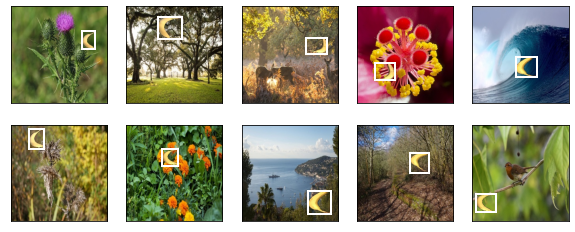

In [10]:
imgs = (batch[0][0:10].permute(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])